1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

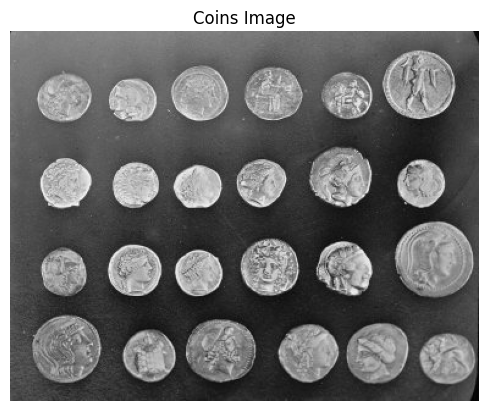

Image shape: (303, 384)
Min pixel value: 1
Max pixel value: 252


In [1]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

image = data.coins()
plt.imshow(image, cmap='gray')
plt.title("Coins Image")
plt.axis('off')
plt.show()

print("Image shape:", image.shape)

print("Min pixel value:", np.min(image))
print("Max pixel value:", np.max(image))


2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

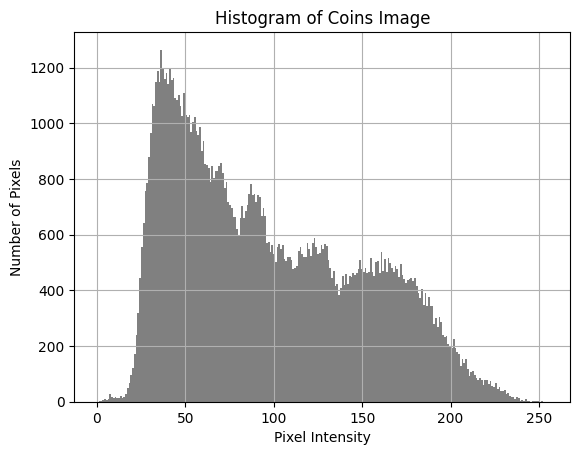

In [2]:
plt.hist(image.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram of Coins Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.show()


The histogram represents how frequently each grayscale value (0–255) occurs in the image.

Multiple Peaks usually correspond to distinct regions with different brightness.

- In this image:

*Dark Background:*

Appears on the left side of the histogram (lower grayscale values).

Background areas are darker — these form the first major peak.

*Medium Grays:*

Middle range values (e.g., shadows, coin edges).

Peaks here represent shaded parts and coin boundaries.

*Bright Regions (Coins):*

Right side of the histogram (high grayscale values, close to white).

Coins are generally brighter, so you'll see strong peaks here due to the reflective metal surface.

3. Applied noise to the image and use the correct function to erase the noise.

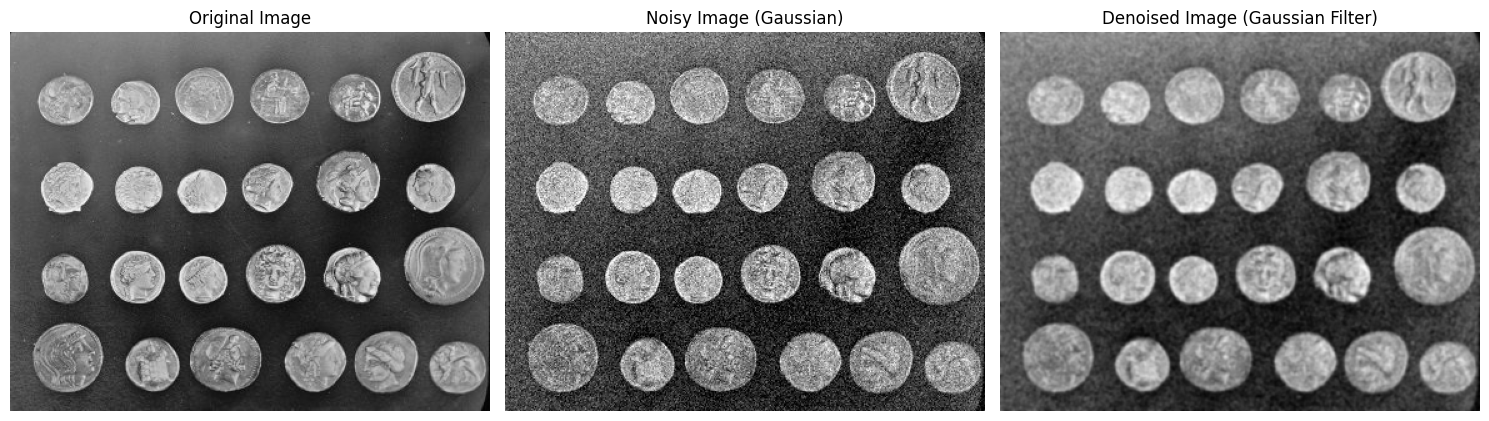

In [3]:
from skimage import data
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import numpy as np
image = data.coins()

noisy_image = random_noise(image, mode='gaussian', var=0.01)

denoised_image = gaussian(noisy_image, sigma=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title("Noisy Image (Gaussian)")
axs[1].axis('off')

axs[2].imshow(denoised_image, cmap='gray')
axs[2].set_title("Denoised Image (Gaussian Filter)")
axs[2].axis('off')

plt.tight_layout()
plt.show()


4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

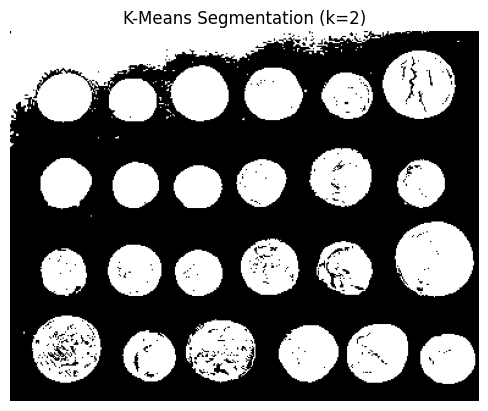

In [4]:
from skimage import data
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
image = data.coins()
pixels = image.reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pixels)
clustered = kmeans.labels_.reshape(image.shape)

plt.imshow(clustered, cmap='gray')
plt.title("K-Means Segmentation (k=2)")
plt.axis('off')
plt.show()


5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

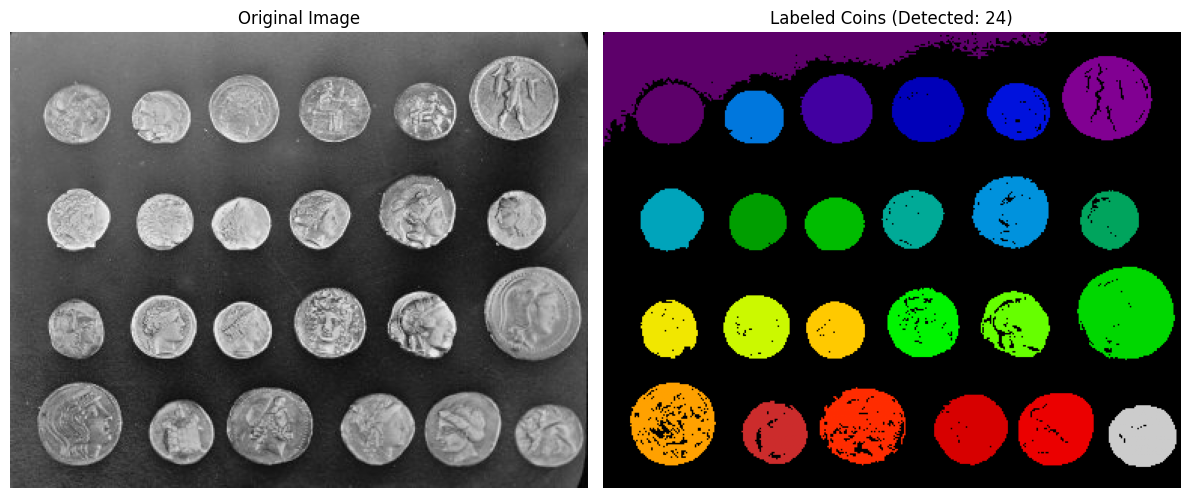

Corrected number of coins detected: 24


In [6]:
from skimage import data, measure, morphology
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

image = data.coins()

# K-means clustering (k=2)
pixels = image.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pixels)
segmented = kmeans.labels_.reshape(image.shape)

# Ensure foreground = 1
if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented

from skimage.morphology import remove_small_objects

segmented_cleaned = remove_small_objects(segmented.astype(bool), min_size=500)  # keep only large blobs
labels = measure.label(segmented_cleaned, connectivity=2)
num_coins = np.max(labels)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(labels, cmap='nipy_spectral')
axs[1].set_title(f"Labeled Coins (Detected: {num_coins})")
axs[1].axis('off')
plt.tight_layout()
plt.show()
print("Corrected number of coins detected:", num_coins)


6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

Average Area: 1866.625
Average Major Axis Length: 56.952990768829274
Average Orientation (radians): -0.0032797474188605014


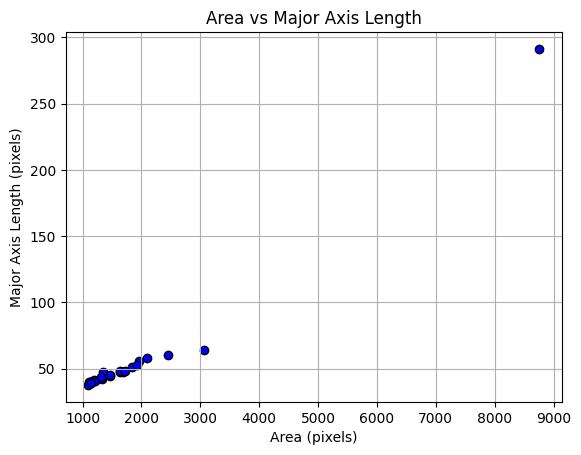

In [7]:
from skimage import data, measure, morphology
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

image = data.coins()
pixels = image.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
segmented = kmeans.labels_.reshape(image.shape)

if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented

segmented_cleaned = morphology.remove_small_objects(segmented.astype(bool), min_size=500)

labels = measure.label(segmented_cleaned, connectivity=2)

props = measure.regionprops(labels)

areas = [p.area for p in props]
major_axes = [p.major_axis_length for p in props]
orientations = [p.orientation for p in props]

print("Average Area:", np.mean(areas))
print("Average Major Axis Length:", np.mean(major_axes))
print("Average Orientation (radians):", np.mean(orientations))

plt.scatter(areas, major_axes, c='blue', edgecolor='black')
plt.title("Area vs Major Axis Length")
plt.xlabel("Area (pixels)")
plt.ylabel("Major Axis Length (pixels)")
plt.grid(True)
plt.show()


7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [8]:
from skimage import data, measure, morphology
from sklearn.cluster import KMeans
import numpy as np

image = data.coins()
pixels = image.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
segmented = kmeans.labels_.reshape(image.shape)

if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented

segmented_cleaned = morphology.remove_small_objects(segmented.astype(bool), min_size=500)

labels = measure.label(segmented_cleaned, connectivity=2)

props = measure.regionprops(labels)

# Filter by area > 1750 pixels
large_coins = [p for p in props if p.area > 1750]
num_large_coins = len(large_coins)
print("Number of coins with area > 1750 pixels:", num_large_coins)


Number of coins with area > 1750 pixels: 7


8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

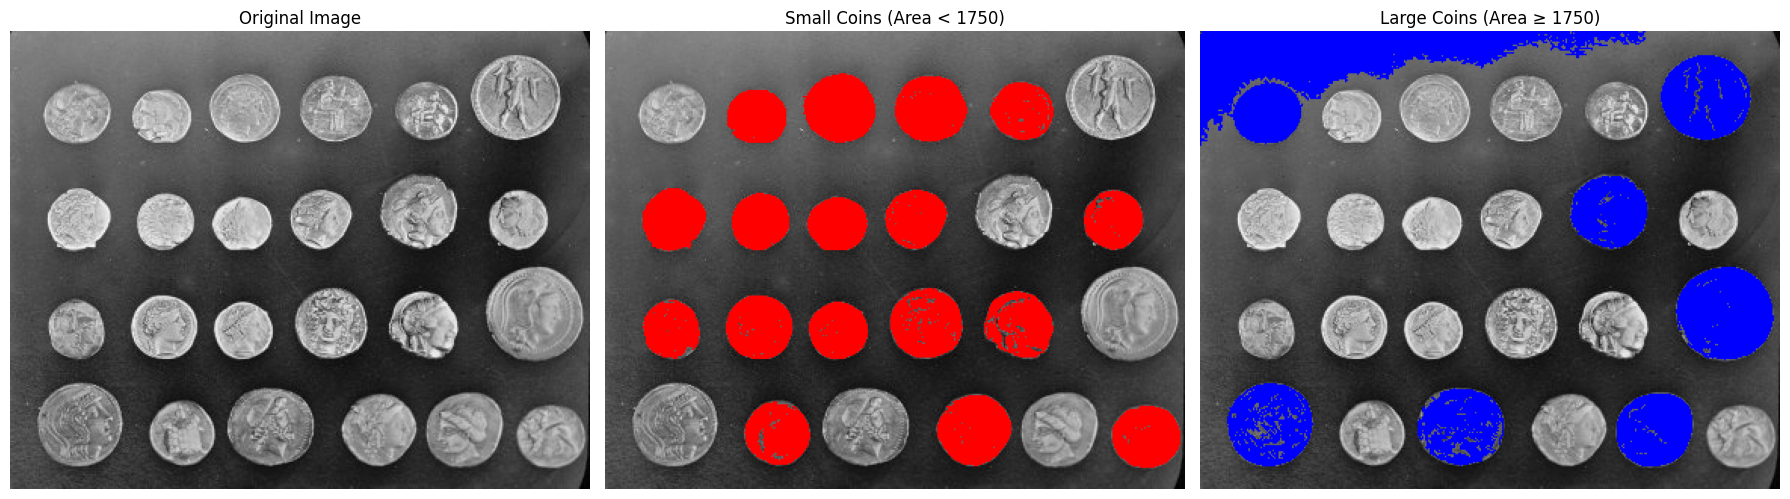

In [10]:
from skimage import data, measure, morphology
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

image = data.coins()
pixels = image.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
segmented = kmeans.labels_.reshape(image.shape)

if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented

segmented_cleaned = morphology.remove_small_objects(segmented.astype(bool), min_size=500)

labels = measure.label(segmented_cleaned, connectivity=2)

small_mask = np.zeros_like(image, dtype=bool)
large_mask = np.zeros_like(image, dtype=bool)

for region in measure.regionprops(labels):
    if region.area < 1750:
        small_mask[labels == region.label] = True
    else:
        large_mask[labels == region.label] = True

from skimage.color import gray2rgb

image_rgb = gray2rgb(image)

small_overlay = image_rgb.copy()
small_overlay[small_mask] = [255, 0, 0]  # red

large_overlay = image_rgb.copy()
large_overlay[large_mask] = [0, 0, 255]  # blue

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(small_overlay)
axs[1].set_title("Small Coins (Area < 1750)")
axs[1].axis('off')

axs[2].imshow(large_overlay)
axs[2].set_title("Large Coins (Area ≥ 1750)")
axs[2].axis('off')

plt.tight_layout()
plt.show()


9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)


1.Load the RGB Image

Read the image and convert it to a standard format (e.g., float or 8-bit).

2.Reshape the Image Data

Flatten the image into a 2D array of pixels:

-shape: (H × W, 3) where each row is a pixel with RGB values.

3.(Optional) Add Spatial Features

To improve clustering, you can add pixel coordinates:

-(R, G, B, x, y) for each pixel.


4.Choose and Apply an Unsupervised Clustering Algorithm

Cluster the pixel data based on similarity.

Common algorithms include:

- K-Means (simple, fast, but requires k)

- Mean Shift (no need for k, captures shape better)

- DBSCAN (detects noise and irregular clusters)

- Agglomerative Clustering (hierarchical grouping)

5.Reshape the Cluster Labels Back to Image Dimensions

Convert the 1D label array to shape (Height, Width) to visualize segmentation.

6.Display or Postprocess the Segmented Image

Assign a unique color to each cluster.

Optionally smooth or filter small regions using morphological operations.



10. Extract the main texture features of this image

In [11]:
from skimage import data
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import numpy as np

image = data.coins()

# For GLCM, values must be in [0, levels-1], reduce to 8-bit if needed
image = (image / 16).astype(np.uint8)  # from 0–255 to 0–15

# Compute GLCM at 1-pixel distance in 0°, 45°, 90°, and 135°
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm = graycomatrix(image, distances=distances, angles=angles, levels=16, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')

print("Texture Features (averaged across angles):")
print("Contrast:", np.mean(contrast))
print("Homogeneity:", np.mean(homogeneity))
print("Energy:", np.mean(energy))
print("Correlation:", np.mean(correlation))


Texture Features (averaged across angles):
Contrast: 1.838340948492731
Homogeneity: 0.7594584603435757
Energy: 0.2159178234395904
Correlation: 0.9167495737471038


**Personal Reflection – Computer Vision Course**

This course gave me a strong foundation in image processing and practical computer vision techniques. I now feel confident applying segmentation, filtering, and feature extraction. It helped me connect theoretical concepts with practical tools in image analysis. I learned how to approach real-world vision problems using Python.


I really appreciated the professor’s clarity and support throughout the course.
Thank you professor for making complex topics easy to follow and engaging.